# Proyecto Final: Juego del ahorcado
Integrantes:

Felix Adolfo Nieto Rangel - 2220093

Alejandro Velandia Gelvez - 2221552

Cristian Mauricio Tello Díaz - 2211857

**Profesor: Luis Carlos Guayacán**

Escuela de Ingeniería de Sistemas e Informática


**IMPORTANTE: Ejecutar las siguientes celdas primero.**



In [ ]:
!mkdir files
!pip install automata-lib

mkdir: cannot create directory ‘files’: File exists


In [ ]:
from IPython.display import Image, display

#Objetivo
El objetivo del proyecto es ser capaces de implementar el juego del "ahorcado" usando un autómata finito determinista el cual dispondrá de varias palabras para que sean adivinadas con un número limitado de intentos.





# Definición formal
Sea A el automata definido: A = ( Q , ∑ , 𝛾 , q0 , F )

Su conjunto de estados: Q = {q0 , q1 , q2 , q3 , q4 , q5 , q6 , q7 , q8 , q9 , q10 , q11 , q12 , q13 , q14, q15, q16, q17, q18, q19, q20, q21, q22   }

Su alfabeto: ∑ = {p, a, l, e, t, c, o, m, r, b, ñ, i, u, n, v}

Sus estados finales: F = {q6}

Sus transiciones:

𝛾( q0 , p ) = q1

𝛾( q0 , m ) = q22

𝛾( q0 , c ) = q7

𝛾( q0 , t ) = q11

𝛾( q0 , a ) = q2

𝛾( q0 , v ) = q16

𝛾( q1 , a ) = q2

𝛾( q1 , i ) = q2

𝛾( q2 , l ) = q3

𝛾( q2 , t ) = q5

𝛾( q3 , e ) = q4

𝛾( q3 , a ) = q6

𝛾( q4 , t ) = q5

𝛾( q5 , a ) = q6

𝛾( q7 , o ) = q8

𝛾( q7 , a ) = q9

𝛾( q7 , u ) = q20

𝛾( q8 , m ) = q3

𝛾( q9 , r ) = q10

𝛾( q9 , l ) = q19

𝛾( q10 , p ) = q3

𝛾( q10 , t ) = q5

𝛾( q11 , a ) = q15

𝛾( q11 , r ) = q12

𝛾( q12 , o ) = q13

𝛾( q13 , m ) = q14

𝛾( q14 , p ) = q3

𝛾( q15 , b ) = q21

𝛾( q16 , i ) = q17

𝛾( q16 , e ) = q18

𝛾( q17 , ñ ) = q3

𝛾( q18 , l ) = q3

𝛾( q19 , c ) = q3

𝛾( q20 , b ) = q3

𝛾( q20 , n ) = q3

𝛾( q21 , l ) = q3

𝛾( q22 , a ) = q2

𝛾( q6 , ) = {}

**Diagrama de transiciones:**

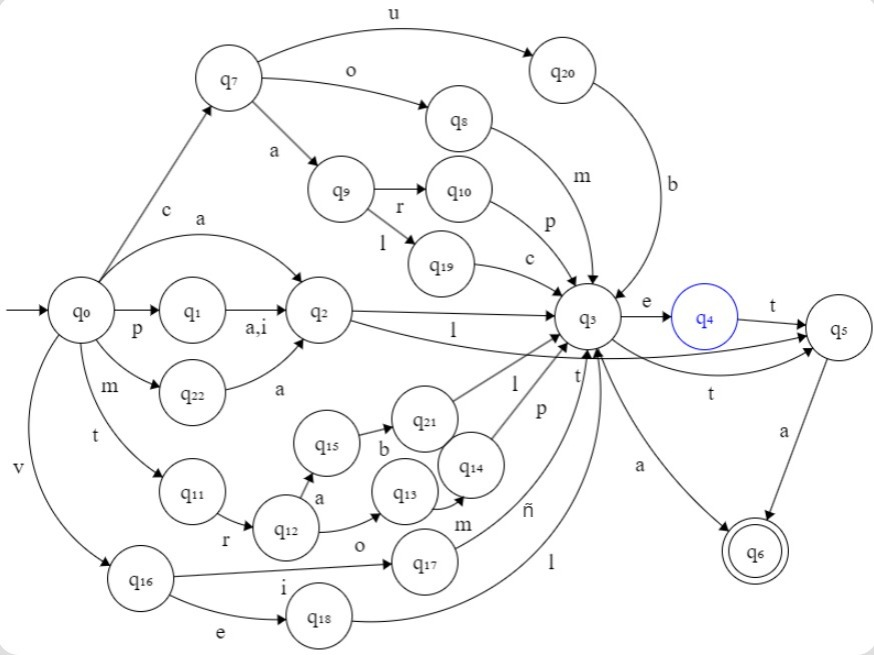

In [ ]:
display(Image('/content/diagrama.jpg')) #NO EJECUTAR CELDA

# Implementación

In [ ]:
def punto1():

    from automata.fa.dfa import DFA
    d = DFA(
        states ={'q0','q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16','q17','q18','q19','q20','q21','q22'},
        input_symbols={'p','a','l','e','t','c','o','m','r','b','ñ','i','u','n','v'},
        transitions={

        'q0':{'p':'q1','m':'q22','c':'q7','t':'q11','a':'q2','v':'q16'},
        'q1':{'a':'q2','i':'q2'},
        'q2':{'l':'q3','t':'q5'},
        'q3':{'e':'q4','a':'q6'},
        'q4':{'t':'q5'},
        'q5':{'a':'q6'},
        'q7':{'o':'q8','a':'q9','u':'q20'},
        'q8':{'m':'q3'},
        'q9':{'r':'q10','l':'q19'},
        'q10':{'p':'q3','t':'q5'},
        'q11':{'a':'q15','r':'q12'},
        'q15':{'b':'q21'},
        'q12':{'o':'q13'},
        'q13':{'m':'q14'},
        'q14':{'p':'q3'},
        'q16':{'i':'q17','e':'q18'},
        'q17':{'ñ':'q3'},
        'q18':{'l':'q3'},
        'q19':{'c':'q3'},
        'q20':{'b':'q3','n':'q3'},
        'q21':{'l':'q3'},
        'q22':{'a':'q2'},
        'q6':{},
        },

        initial_state='q0',
        final_states={'q6'},
        allow_partial = True
    )
    return d

In [ ]:
###########################
# Por si quiere saber las palabras posibles #
###########################
def obtener_palabras(dfa, estado_actual, palabra_actual, palabras_encontradas):
    # Si estamos en un estado final, añadimos la palabra encontrada
    if estado_actual in dfa.final_states:
        palabras_encontradas.append(palabra_actual)

    # Iteramos sobre las transiciones posibles desde el estado actual
    for simbolo in dfa.input_symbols:
        if simbolo in dfa.transitions[estado_actual]:
            proximo_estado = dfa.transitions[estado_actual][simbolo]
            obtener_palabras(dfa, proximo_estado, palabra_actual + simbolo, palabras_encontradas)

def mostrar_palabras_posibles():
    dfa = punto1()
    palabras_encontradas = []
    obtener_palabras(dfa, dfa.initial_state, "", palabras_encontradas)

    print("Palabras posibles encontradas por el DFA:")
    for palabra in palabras_encontradas:
        print(palabra)

#para mostrar las palabras
mostrar_palabras_posibles()

Palabras posibles encontradas por el DFA:
cometa
coma
carpeta
carpa
carta
calceta
calca
cubeta
cuba
cuneta
cuna
pileta
pila
pita
paleta
pala
pata
maleta
mala
mata
veleta
vela
viñeta
viña
aleta
ala
ata
trompeta
trompa
tableta
tabla


In [ ]:
import random
def obtener_palabras(dfa, estado_actual, palabra_actual, palabras_encontradas):
    if estado_actual in dfa.final_states:
        palabras_encontradas.append(palabra_actual)

    for simbolo in dfa.input_symbols:
        if simbolo in dfa.transitions[estado_actual]:
            proximo_estado = dfa.transitions[estado_actual][simbolo]
            obtener_palabras(dfa, proximo_estado, palabra_actual + simbolo, palabras_encontradas)

def obtener_palabra_aleatoria(palabras_encontradas):
    return random.choice(palabras_encontradas)


Corra las siguiente celdas para jugar

In [ ]:
def mostrar_ahorcado(intentos):
    estados_ahorcado = [
        """
           -----
           |   |
           |
           |
           |
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |
           |
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |   |
           |
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |  /|
           |
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |  /|\\
           |
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |  /|\\
           |  /
           |
        ---------
        """,
        """
           -----
           |   |
           |   O
           |  /|\\
           |  / \\
           |
        ---------
        """
    ]
    print(estados_ahorcado[intentos])

def jugar_ahorcado(dfa):
    palabras_encontradas = []
    obtener_palabras(dfa, dfa.initial_state, "", palabras_encontradas)

    palabra_seleccionada = obtener_palabra_aleatoria(palabras_encontradas)
    letras_correctas = set()
    intentos_maximos = 6
    intentos = 0
    palabra_oculta = ['_'] * len(palabra_seleccionada)

    print("¡Bienvenido al juego del ahorcado!")
    print(f"Adivina la palabra. Tienes {intentos_maximos} intentos.")

    while intentos < intentos_maximos:
        print("\nPalabra:", " ".join(palabra_oculta))
        mostrar_ahorcado(intentos)
        entrada = input("Ingresa una letra o la palabra completa: ").lower()

        if len(entrada) == 1:
            letra = entrada
            if letra in letras_correctas:
                print("¡Ya has ingresado esa letra!")
                continue

            if letra in palabra_seleccionada:
                print("¡Letra correcta!")
                for i, l in enumerate(palabra_seleccionada):
                    if l == letra:
                        palabra_oculta[i] = letra
                letras_correctas.add(letra)

                if "_" not in palabra_oculta:
                    print("\n¡Felicidades! ¡Has adivinado la palabra correctamente!")
                    print("La palabra eshjgfjhg:", palabra_seleccionada)
                    break
            else:
                print("Letra incorrecta. ¡Intenta de nuevo!")
                intentos += 1
        else:
            if entrada == palabra_seleccionada:
                print("\n¡Felicidades! ¡Has adivinado la palabra correctamente!")
                print("La palabra es:", palabra_seleccionada)
                break
            else:
                print("Palabra incorrecta. ¡Intenta de nuevo!")
                intentos += 1

    if "_" in palabra_oculta and intentos >= intentos_maximos:
        print("\n¡Has agotado tus intentos!")
        print("La palabra correcta era:", palabra_seleccionada)
        mostrar_ahorcado(intentos)



In [ ]:
# Ejecutar el juego del ahorcado
dfa = punto1()
jugar_ahorcado(dfa)